## Ex. 1
fit the sigmoid curve and calculate decision boundary using given dataset


In [1]:
from matplotlib import pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

In [2]:
# optimization loop
iterations = 10000
min_cost = 100
eps = 0.00001
lr = 0.1
theta_deriv = [0, 0]
for i in range(iterations):

    h = 1/(1 + np.exp(-theta[0] - theta[1] * X))
    crossentropy = -y * np.log(h + eps) - (1 - y) * np.log(1 - h + eps)
    cost = sum(crossentropy) / len(X)

    theta_deriv[0] = sum(h - y) / len(y)
    theta_deriv[1] = sum((h - y) * X) / len(y)

    for j in range(len(theta)):
        theta[j] = theta[j] - lr * theta_deriv[j]

    print("iteration: ", str(i + 1), ", cost: ", cost)

    if np.abs(min_cost - cost) < eps:
        break

    min_cost = cost

print(theta)


iteration:  1 , cost:  0.6931271553039551
iteration:  2 , cost:  0.6590212463316593
iteration:  3 , cost:  0.6039771098982204
iteration:  4 , cost:  0.5991105389865962
iteration:  5 , cost:  0.5950799516656182
iteration:  6 , cost:  0.5911668234250762
iteration:  7 , cost:  0.5873236188834364
iteration:  8 , cost:  0.5835427398031409
iteration:  9 , cost:  0.5798223011872985
iteration:  10 , cost:  0.5761610554023222
iteration:  11 , cost:  0.5725577046925371
iteration:  12 , cost:  0.5690111897208474
iteration:  13 , cost:  0.565520239147273
iteration:  14 , cost:  0.5620837529951875
iteration:  15 , cost:  0.5587006434798241
iteration:  16 , cost:  0.5553697716783393
iteration:  17 , cost:  0.5520901266824115
iteration:  18 , cost:  0.548860618675297
iteration:  19 , cost:  0.5456802130422809
iteration:  20 , cost:  0.5425479246134107
iteration:  21 , cost:  0.5394628081809391
iteration:  22 , cost:  0.5364238016984679
iteration:  23 , cost:  0.5334300263361498
iteration:  24 , cost:

#### Plot results 

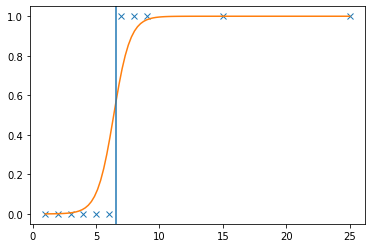

In [3]:
x_linspace = np.linspace(min(X), max(X), 100)
y_linspace = 1 / (1 + np.exp(-theta[0] - theta[1]*x_linspace))

plt.plot(X, y, 'x')
plt.plot(x_linspace, y_linspace, '-')
border_indexes = np.where(y_linspace >=0.5-eps)
plt.axvline(x=x_linspace[border_indexes[0][0]])
plt.show()

## Ex. 2
generalize optimization code for X being a matrix, where its rows are features and columns are examples


In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # bias' 'variables' already appended to X
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3, 4, 2]], dtype=np.float32)

y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=np.float32)

theta = np.zeros((X.shape[0], 1))

In [6]:
# optimization loop
iterations = 100000
min_cost = 100
eps = 0.00001
lr = 0.1

for i in range(iterations):

    h = 1 / (1 + np.exp(-theta.T @ X))
    crossentropy = -y * np.log(h + eps) - (1 - y) * np.log(1 - h + eps)
    [cost] = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_deriv = sum((h - y) @ X.T) / X.shape[1]
    theta_deriv.shape = [len(theta_deriv), 1]

    # for j in range(len(theta)):
    #     theta[j] = theta[j] - lr * theta_deriv[j]
    theta = theta - lr * theta_deriv

    if i%50==0:
        print("iteration: ", str(i + 1), ", cost: ", cost)

    if np.abs(min_cost - cost) < eps:
        print("iteration: ", str(i + 1), ", cost: ", cost) if i%50!=0 else None 
        break

    min_cost = cost

print(theta)

iteration:  1 , cost:  0.6931271807599427
iteration:  51 , cost:  0.16166831718822214
iteration:  101 , cost:  0.14501374588421737
iteration:  151 , cost:  0.1367247276307846
iteration:  201 , cost:  0.1312322700211794
iteration:  251 , cost:  0.12708013525613474
iteration:  301 , cost:  0.12369862764467456
iteration:  351 , cost:  0.120813158840145
iteration:  401 , cost:  0.11827267524933709
iteration:  451 , cost:  0.11598603808388798
iteration:  501 , cost:  0.11389435803912319
iteration:  551 , cost:  0.11195751615576341
iteration:  601 , cost:  0.11014700671504453
iteration:  651 , cost:  0.10844187091316887
iteration:  701 , cost:  0.10682625639517189
iteration:  751 , cost:  0.10528788455745595
iteration:  801 , cost:  0.10381705043612453
iteration:  851 , cost:  0.10240594844567301
iteration:  901 , cost:  0.10104820478904247
iteration:  951 , cost:  0.0997385451114779
iteration:  1001 , cost:  0.0984725531156602
iteration:  1051 , cost:  0.09724649185500824
iteration:  1101 ,

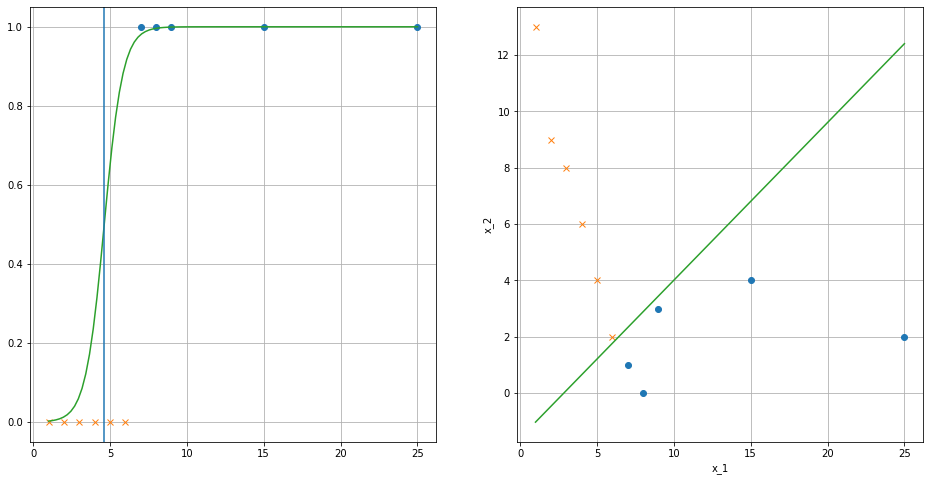

In [7]:
neg_pred = np.where(y == 0)[0]
pos_pred = np.where(y == 1)[0]

index_1 = 1
index_2 = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

x_samples = np.ones((X.shape[0], 100))
x_tmp = np.linspace(min(X[index_1, :]), max(X[index_1, :]), 100)
x_samples[index_1, :] = x_tmp
y_samples = 1 / (1 + np.exp(-theta.T @ x_samples))

ax1.plot(X[index_1, pos_pred], y[pos_pred], 'o')
ax1.plot(X[index_1, neg_pred], y[neg_pred], 'x')
ax1.plot(x_tmp, y_samples[0, :], '-')
try:
    border_indexes = np.where(y_samples[0, :] >= 0.5 - eps)
    # print(border_indexes)
    ax1.axvline(x=x_samples[1, border_indexes[0][0]])
except IndexError as e:
    print(e)
ax1.grid()



x_samples = np.ones((X.shape[0], 100))
x1_tmp = np.linspace(min(X[index_1, :]), max(X[index_1, :]), 100)
x2_tmp = np.linspace(min(X[index_2, :]), max(X[index_2, :]), 100)
x_samples[index_1, :] = x1_tmp
x_samples[index_2, :] = x2_tmp

decision_b_samples = -theta[0]/theta[2] - theta[1]/theta[2] * x_samples

ax2.plot(X[index_1, pos_pred], X[index_2, pos_pred], 'o')
ax2.plot(X[index_1, neg_pred], X[index_2, neg_pred], 'x')
ax2.plot(x1_tmp, decision_b_samples[1, :], '-')

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()


## Ex. 3
 using real data, optimize classifier to predict given values

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [9]:
class Classifier:
    theta = None

    def fit(self, X, y, nb_epochs=10000, eps=0.00001, lr=0.2):
        if X.shape[1] != len(y):
            X = X.T

        X_extented = self._extend_X(X)
        theta = np.zeros((X_extented.shape[0], 1))
        last_cost = 99

        for i in range(nb_epochs):

            h = 1 / (1 + np.exp(-theta.T @ X_extented))
            crossentropy = -y * np.log(h + eps) - (1 - y) * np.log(1 - h + eps)
            [cost] = np.sum(crossentropy, axis=1) / len(y)

            theta_deriv = sum((h - y) @ X_extented.T) / len(y)
            theta_deriv.shape = [len(theta_deriv), 1]

            # for j in range(len(theta)):
            #     theta[j] = theta[j] - lr * theta_deriv[j]
            theta = theta - lr * theta_deriv
            
            if i%50==0:
                print("iteration: ", str(i + 1), ", cost: ", cost)

            if np.abs(last_cost - cost) < eps:
                print("iteration: ", str(i + 1), ", cost: ", cost)
                break

            last_cost = cost

        self.theta = theta
        print(theta)

    def predict(self, X):
        if self._is_fitted():

            eps = 0.0001
            X_extented = self._extend_X(X)

            h = 1 / (1 + np.exp(-self.theta.T @ X_extented))

            # pos_pred = np.where(h>= 0.5 - eps)
            neg_pred = np.where(h < 0.5 - eps)

            y_pred = np.ones((1, X.shape[1]))
            y_pred[neg_pred] = 0

            return y_pred
        else:
            print("Please fit the classifier before use.")
            return -1

    def _is_fitted(self):
        return not (self.theta is None)

    def _extend_X(self, X):
        X_extented = np.ones((X.shape[0] + 1, X.shape[1]))
        for i in range(X.shape[0]):
            X_extented[i + 1, :] = X[i]

        return X_extented

    def plot(self, X):
        #note only for 2-dim data

        X_extented = self._extend_X(X)

        neg_pred = np.where(y == 0)[0]
        pos_pred = np.where(y == 1)[0]

        index_1 = 1
        index_2 = 2

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        x_samples = np.ones((X_extented.shape[0], 100))
        x_tmp = np.linspace(min(X_extented[index_1, :]), max(X_extented[index_1, :]), 100)
        x_samples[index_1, :] = x_tmp
        y_samples = 1 / (1 + np.exp(-self.theta.T @ x_samples))

        ax1.plot(X_extented[index_1, pos_pred], y[pos_pred], 'o')
        ax1.plot(X_extented[index_1, neg_pred], y[neg_pred], 'x')
        ax1.plot(x_tmp, y_samples[0, :], '-')
        try:
            border_indexes = np.where(y_samples[0, :] >= 0.5 - 0.0001)
            # print(border_indexes)
            ax1.axvline(x=x_samples[1, border_indexes[0][0]])
        except IndexError as e:
            print(e)

        x_samples = np.ones((X_extented.shape[0], 100))
        x1_tmp = np.linspace(min(X_extented[index_1, :]), max(X_extented[index_1, :]), 100)
        x2_tmp = np.linspace(min(X_extented[index_2, :]), max(X_extented[index_2, :]), 100)
        x_samples[index_1, :] = x1_tmp
        x_samples[index_2, :] = x2_tmp

        decision_b_samples = -self.theta[0] / self.theta[2] - self.theta[1] / self.theta[2] * x_samples

        ax2.plot(X_extented[index_1, pos_pred], X_extented[index_2, pos_pred], 'o')
        ax2.plot(X_extented[index_1, neg_pred], X_extented[index_2, neg_pred], 'x')
        ax2.plot(x1_tmp, decision_b_samples[1, :], '-')

        plt.xlabel("x_1")
        plt.ylabel("x_2")
        plt.show()


    def calculate_TP_FP_TN_FN(self, X, y_true):
        #   result of the function could also be confusion matrix,
        #   but values returned as tuple will be more helpful in the excercise

        y_pred = self.predict(X)

        TP = np.sum(np.logical_and(y_pred == 1, y_true == 1))
        FP = np.sum(np.logical_and(y_pred == 0, y_true == 1))
        TN = np.sum(np.logical_and(y_pred == 0, y_true == 0))
        FN = np.sum(np.logical_and(y_pred == 1, y_true == 0))

        return (TP, FP, TN, FN)


Read, preprocess and split data 

In [10]:
data = pd.read_csv('./data.txt')
data = data.values

# Preprocess data

data[:, 0] = (data[:, 0] - np.mean(data[:, 0])) / np.std(data[:, 0])
data[:, 1] = (data[:, 1] - np.mean(data[:, 1])) / np.std(data[:, 1])

X = data[:, [0, 1]]
y = data[:, 2]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train the classifier

In [11]:
classifier = Classifier()

classifier.fit(X_train, y_train)

iteration:  1 , cost:  0.6931271807599427
iteration:  51 , cost:  0.2513742446685137
iteration:  101 , cost:  0.20161153362319317
iteration:  151 , cost:  0.1810161460318187
iteration:  201 , cost:  0.16939279236150895
iteration:  251 , cost:  0.16182903549397118
iteration:  301 , cost:  0.1564858621818173
iteration:  351 , cost:  0.1525038814254263
iteration:  401 , cost:  0.14942238179517894
iteration:  451 , cost:  0.14697005314803424
iteration:  501 , cost:  0.1449757907171574
iteration:  551 , cost:  0.14332589493469008
iteration:  601 , cost:  0.14194163289447032
iteration:  651 , cost:  0.1407666361041304
iteration:  701 , cost:  0.13975942098640692
iteration:  751 , cost:  0.13888874409571192
iteration:  801 , cost:  0.13813060640274094
iteration:  851 , cost:  0.13746625806756588
iteration:  901 , cost:  0.13688083233700932
iteration:  942 , cost:  0.13645122420674344
[[1.64160224]
 [4.20239179]
 [3.01530583]]


In [12]:
y_pred = classifier.predict(X_test.T)

print(y_pred)
print(y_test)


[[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1. 0.]]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0.]


Calculate TP, FP, TN, FN on test set

In [13]:
(TP, FP, TN, FN) = classifier.calculate_TP_FP_TN_FN(X_test.T, y_test)

print(f"TP={TP}, FP={FP}, TN={TN}, FN={FN}  ")

TP=15, FP=3, TN=12, FN=3  


Calculate sensitivity, specificity, positive predictivity and negative predictivity

In [14]:
sensitivity = TP / (TP + FN)
positive_redictivity = TP / (TP + FP)

specificity = TN / (TN + FP)
negative_predictivity = TN / (TN + FP)

print(f"calculated sensitivity = {sensitivity},\n"
      f"specificity = {specificity}, \n"
      f"positive predictivity = {positive_redictivity} \n"
      f"and negative predictivity = {negative_predictivity}")


calculated sensitivity = 0.8333333333333334,
specificity = 0.8, 
positive predictivity = 0.8333333333333334 
and negative predictivity = 0.8


Plot results 

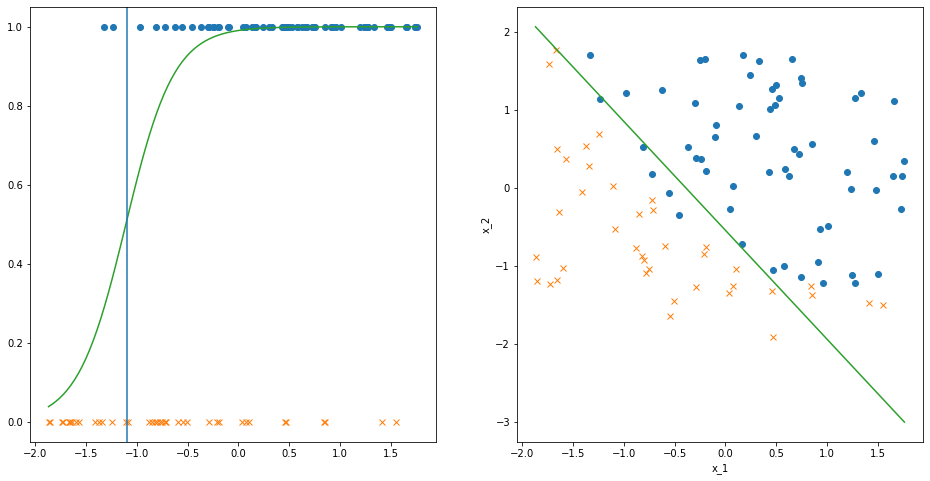

In [15]:
classifier.plot(X.T)
